In [63]:
import os
import pandas as pd
import numpy as np

In [64]:
path = r'F:\Astral\backup\backup3\Cont_AA_2_1'
file = r'neighbors.csv'
abs_file = r'segmentation_absolute.h5'
waves_path = os.path.join(path, 'waves_morph.npy')

In [106]:
neighbor_csv = pd.read_csv(os.path.join(path, file))
abs_csv = pd.read_hdf(os.path.join(path, abs_file))
rel_csv = pd.read_hdf(os.path.join(path, r'segmentation_relative.h5'))
waves = np.load(waves_path)

In [66]:
def intersection_over_union(shape1, shape2):
    intersection = intersection2d(shape1, shape2)
    union = np.unique(np.vstack([shape1, shape2]), axis=0)
    return intersection.shape[0] / union.shape[0]

In [67]:
def intersection2d(X, Y):
        """
        Function to find intersection of two 2D arrays.
        Returns index of rows in X that are common to Y.
        """
        X = np.tile(X[:,:,None], (1, 1, Y.shape[0]) )
        Y = np.swapaxes(Y[:,:,None], 0, 2)
        Y = np.tile(Y, (X.shape[0], 1, 1))
        eq = np.all(np.equal(X, Y), axis = 1)
        eq = np.any(eq, axis = 1)
        return np.nonzero(eq)[0]

In [68]:
def get_shape_voxels_by_id(abs_csv, shape_id):
    return abs_csv.loc[abs_csv['id'] == shape_id]

def get_z_projection(shape):
    shape = shape[['x', 'y']]
    shape = np.unique(shape, axis=0)
    return shape

def do_overlap(shape1, shape2, threshold):
    intersected = intersection2d(shape1, shape2)
    iou = intersection_over_union(shape1, shape2)
    larger = sorted([shape1, shape2], key=len)[-1]
#     print(f'Intersection length: {intersected.shape[0]}')
#     print(f'Shape1 shape: {shape1.shape[0]}')
#     print(f'Shape2 shape: {shape2.shape[0]}')
    return intersected.shape[0] / larger.shape[0] >= threshold
#     return iou > threshold

In [69]:
from tqdm import tqdm
from collections import defaultdict

threshold = 0.8

ids = np.unique(neighbor_csv['shape_id_1'].values).tolist()

repeats = defaultdict(list)
singles = []

for shape1_id in tqdm(ids):
    shape1 = get_shape_voxels_by_id(abs_csv, shape1_id)
#     print(f"Shape1 id: {shape1_id}")
    neighbors = neighbor_csv.loc[neighbor_csv['shape_id_1'] == shape1_id]['shape_id_2'].values
#     print(f"Neighbors : {neighbors}")
    for shape2_id in neighbors:
        shape2 =  get_shape_voxels_by_id(abs_csv, shape2_id)
#         print(f"Shape2 id: {shape2_id}")
        shape1_proj = get_z_projection(shape1)
        shape2_proj = get_z_projection(shape2)
        if do_overlap(shape1_proj, shape2_proj, threshold):
            repeats[shape1_id].append(shape2_id)
    if not repeats[shape1_id]:
        singles.append(shape1_id)

  0%|                                                                                          | 0/931 [00:04<?, ?it/s]


KeyboardInterrupt: 

In [13]:
import pickle

with open(os.path.join(path, 'repeats.pickle'), 'rb') as f:
    r = pickle.load(f)

In [14]:
r

[[43, 47, 50, 52],
 [143, 177, 251],
 [170, 199, 204],
 [365, 454, 467, 507, 508],
 [493, 542, 632]]

In [107]:
shape1 = get_shape_voxels_by_id(abs_csv, 14)
shape1 = get_z_projection(shape1)

In [108]:
shape2 = get_shape_voxels_by_id(abs_csv, 17)
shape2 = get_z_projection(shape2)

In [132]:
shape2 = get_shape_voxels_by_id(rel_csv, 100)


In [133]:
idxs = shape2[['x', 'y', 'z']].values

In [134]:
def create_3d_shape(shape_idxs):
    dim_x = shape_idxs[:, 0].max()+1 - shape_idxs[:, 0].min()
    dim_y = shape_idxs[:, 1].max()+1 - shape_idxs[:, 1].min()
    dim_t = shape_idxs[:, 2].max()+1 - shape_idxs[:, 2].min()
    
    volume = np.zeros(shape=(dim_x, dim_y, dim_t))
    for row in shape_idxs:
        volume[row[0], row[1], row[2]] = 1
        
    return volume

In [135]:
vol = create_3d_shape(idxs)
proj = np.sum(vol, axis=2)
proj[proj>0] = 1
proj = proj.astype(np.int)

import

circ = lambda r: (4 * math.pi * r.area) / (r.perimeter * r.perimeter)

In [136]:
[circ(region) for region in regionprops(proj)]

[0.5918405577078788]

In [142]:
reg = list(regionprops(proj))

In [148]:
reg[0].major_axis_length
circ(reg[0])

0.5918405577078788

In [140]:
out = regionprops(proj)

In [141]:
out

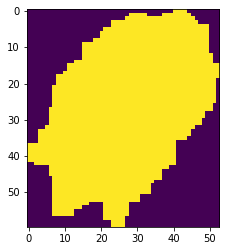

In [139]:
plt.imshow(proj)

In [19]:
shape2.shape

(4551, 2)

In [42]:
projection_plane = np.zeros(shape=(shape1[:, 0].max()+1, shape1[:, 1].max()+1), dtype=np.int16)

In [51]:
for item in shape1:
    projection_plane[item[0], item[1]] = 1

In [52]:
projection_plane[shape1] = 1

In [53]:
projection_plane

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int16)

In [54]:
from skimage.measure import regionprops

In [57]:
idx = np.concatenate([shape1[:, 0], shape1[:, 1]])

In [55]:
out = regionprops(projection_plane)

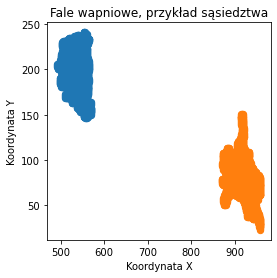

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.scatter(shape1[:,0], shape1[:,1], s=40)
plt.scatter(shape2[:,0], shape2[:,1], s=40)
plt.ylabel('Koordynata Y')
plt.xlabel('Koordynata X')
plt.title('Fale wapniowe, przykład sąsiedztwa')
plt.show()

In [79]:
shape1 = get_shape_voxels_by_id(abs_csv, 170)
shape1 = get_z_projection(shape1)

In [80]:
shape2 = get_shape_voxels_by_id(abs_csv, 199)
shape2 = get_z_projection(shape2)

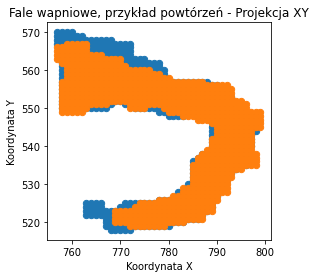

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.scatter(shape1[:,0], shape1[:,1], s=40)
plt.scatter(shape2[:,0], shape2[:,1], s=40)
plt.ylabel('Koordynata Y')
plt.xlabel('Koordynata X')
plt.title('Fale wapniowe, przykład powtórzeń - Projekcja XY')
plt.show()

In [151]:
p = r'F:\Astral\backup\backup\OGD_AN_3_2'
opj = os.path.join

ne = pd.read_csv(opj(p, 'neighbors.csv'))

In [152]:
ne

,shape_id_1,shape_id_2,center_dist_xy,center_dist_t,center_of_mass_dist_xy,center_of_mass_dist_t
0,0,1,100,85,111,86
1,0,135,110,117,115,126
2,0,136,188,168,200,177
3,0,137,196,135,209,125
4,0,142,107,204,117,195
...,...,...,...,...,...,...
2035,220,4,144,57,144,56
2036,220,3,85,98,81,98
2037,220,124,88,40,87,39
2038,220,43,91,0,95,1


In [202]:
ne2 = ne.groupby('shape_id_1').count().iloc[:, :1]
ne3 = ne.groupby('shape_id_1').mean().iloc[:, -2:]

ne4 = pd.merge(ne2, ne3, right_index=True, left_index=True)
ne4.index.Name = 'id'
ne4.columns = ['n_neighbors', 'avg_xy_dist_center-of-mass', 'avg_t_interval_center-of-mass']



In [203]:
ne4

,n_neighbors,avg_xy_dist_center-of-mass,avg_t_interval_center-of-mass
shape_id_1,,,
0,34,141.970588,98.882353
1,20,93.600000,100.350000
2,13,134.153846,67.153846
3,34,99.588235,86.558824
4,22,86.045455,71.090909
...,...,...,...
217,14,74.357143,65.500000
218,3,64.333333,90.000000
219,9,81.888889,79.222222


In [196]:
df_stat = pd.DataFrame()

In [197]:
id; n_neighbors; avg_t_interval_center-of-mass; avg_xy_dist_center-of-mass

NameError: name 'n_neighbors' is not defined

In [207]:
ne4['id'] = ne4.index
ne4 = ne4[['id', 'n_neighbors', 'avg_xy_dist_center-of-mass', 'avg_t_interval_center-of-mass']]

In [208]:
ne4

,id,n_neighbors,avg_xy_dist_center-of-mass,avg_t_interval_center-of-mass
shape_id_1,,,,
0,0,34,141.970588,98.882353
1,1,20,93.600000,100.350000
2,2,13,134.153846,67.153846
3,3,34,99.588235,86.558824
4,4,22,86.045455,71.090909
...,...,...,...,...
217,217,14,74.357143,65.500000
218,218,3,64.333333,90.000000
219,219,9,81.888889,79.222222


In [190]:
ne3

,center_of_mass_dist_xy,center_of_mass_dist_t
shape_id_1,,
0,141.970588,98.882353
1,93.600000,100.350000
2,134.153846,67.153846
3,99.588235,86.558824
4,86.045455,71.090909
...,...,...
217,74.357143,65.500000
218,64.333333,90.000000
219,81.888889,79.222222


In [191]:
ne2

,shape_id_2
shape_id_1,
0,34
1,20
2,13
3,34
4,22
...,...
217,14
218,3
219,9


In [131]:
shape1[:,1]

array([401, 402, 403, ..., 490, 491, 492])

In [117]:
repeats_uq

{0: [482, 432, 427, 317, 277]}

In [88]:
shape1 = get_shape_voxels_by_id(abs_csv, 1)

In [89]:
shape1_proj = get_z_projection(shape1)

In [90]:
shape1_proj

array([[175, 310],
       [175, 311],
       [175, 312],
       ...,
       [463, 127],
       [463, 128],
       [463, 129]])

In [91]:
shape1_proj.shape

(29222, 2)

In [92]:
shape1.shape

(610221, 5)

In [93]:
shape2 = get_shape_voxels_by_id(abs_csv, 330)

In [95]:
shape2_proj = get_z_projection(shape2)

In [98]:
inter = intersection2d(shape1_proj, shape2_proj)

In [107]:
inter.shape[0]/shape2.shape[0]

0.35294117647058826

In [ ]:
[425, 408, 325, 309, 251, 507, 216]

In [242]:
id1, id2, id3 = 241, 285, 266

In [243]:
shape1 = get_shape_voxels_by_id(abs_csv, id1)
shape1_proj = get_z_projection(shape1)

shape2 = get_shape_voxels_by_id(abs_csv, id2)
shape2_proj = get_z_projection(shape2)

shape3 = get_shape_voxels_by_id(abs_csv, id3)
shape3_proj = get_z_projection(shape3)

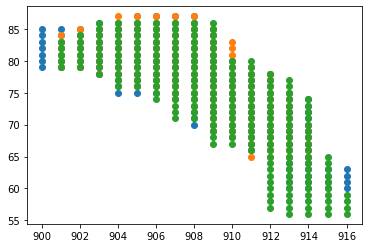

In [244]:
plt.scatter(shape1_proj[:,0], shape1_proj[:,1])
plt.scatter(shape2_proj[:,0], shape2_proj[:,1])
plt.scatter(shape3_proj[:,0], shape3_proj[:,1])

In [95]:
repeats_uq = {key: value for key, value in repeats.items() if value}

In [96]:
single_additional = [key for key, value in repeats_uq.items() if len(value) < 2]
repeats_uq = {key: value for key, value in repeats_uq.items() if len(value) >= 2}

In [104]:
repeats_uq

{26: [65, 31],
 82: [67, 81],
 216: [128, 309],
 236: [266, 241],
 241: [285, 254, 266, 236],
 254: [285, 241],
 266: [236, 241],
 285: [254, 241],
 309: [216, 251],
 366: [409, 312]}

In [109]:
repeats_l = [[key, *value] for key, value in repeats_uq.items()]

In [19]:
import itertools


def do_lists_intersect(list_a, list_b):
    return bool(set(list_a) & set(list_b))

def remove_duplicate_lists_from_list(list_of_lists):
    list_of_lists.sort()
    return list(list_of_lists for list_of_lists,_ in itertools.groupby(list_of_lists))

def merge_repeats(repeats_list):
    final_repeats = []
    for i in range(len(repeats_list)):
        new_repeats = repeats_list[i]
        for j in range(i+1, len(repeats_list)):
            if i != j:
                if do_lists_intersect(repeats_list[i], repeats_list[j]):
                    new_repeats.extend(repeats_list[j])
        new_repeats = list(set(new_repeats))
        final_repeats.append(new_repeats)
    
    final_repeats = remove_duplicate_lists_from_list(final_repeats)    
    return final_repeats

In [137]:
repeats_l = [[key, *value] for key, value in repeats_uq.items()]

In [157]:
repeats_final

[[65, 26, 31],
 [81, 82, 67],
 [216, 128, 251, 309],
 [266, 236, 241, 285, 254],
 [312, 409, 366]]

In [133]:
repeats_final = merge_repeats(repeats_l.copy())

In [20]:
def exclude_repeats_from_singles(all_repeat_ids, singles):
    for repeat in all_repeat_ids:
        if repeat in singles: 
            singles.remove(repeat)
    return singles

In [160]:
singles.extend(single_additional)

In [161]:
singles = exclude_repeats_from_singles(all_repeat_ids, singles)

In [163]:
do_lists_intersect(singles, all_repeat_ids)

False

In [155]:
import pickle



In [147]:
all_repeat_ids = [x for item in repeats_final for x in item]

In [159]:
with open(r'C:\Users\Wojtek\Documents\Doktorat\Astral\data\repeats.pickle', 'wb') as handle:
    pickle.dump(repeats_final, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [165]:
singles = pickle.loads(r'C:\Users\Wojtek\Documents\Doktorat\Astral\data\Cont_AA_1_2\singles.pickle')

TypeError: a bytes-like object is required, not 'str'

In [168]:
with open(r'C:\Users\Wojtek\Documents\Doktorat\Astral\data\singles.pickle', 'rb') as f:
        singles = pickle.load(f)

In [51]:
with open(r'C:\Users\Wojtek\Documents\Doktorat\Astral\data\Cont_AA_2_1\repeats.pickle', 'rb') as f:
    r = pickle.load(f)

In [52]:
r

[[42, 47, 46, 55],
 [42, 55, 46, 47],
 [47, 46, 55],
 [172, 204, 205],
 [178, 245, 150],
 [204, 172, 205],
 [221, 365, 494],
 [418, 653, 590],
 [480, 511, 516, 472],
 [480, 516, 472, 380, 511],
 [480, 516, 511],
 [507, 668, 395]]

In [ ]:
def merge_common_shapes

In [42]:
r

[[47, 46, 55, 42, 47, 46, 55, 42, 55, 46, 47],
 [178, 245, 150],
 [204, 172, 205, 172, 204, 205],
 [221, 365, 494],
 [418, 653, 590],
 [480, 516, 511, 480, 511, 516, 472, 480, 516, 472, 380, 511],
 [507, 668, 395]]

In [49]:
changed = True

while changed:
    changed = False
    for i in range(len(r)):
        repeat = r[i]
        for j in range(len(r)):
            if i != j:
                repeat2 = r[j]
                if not set(repeat).isdisjoint(repeat2):
                    changed = True
                    r[i].extend(r[j])
                    del r[j]
                    break
        if changed:
            break
    
r = [sorted(list(set(repeat))) for repeat in r]


In [50]:
r

[[42, 46, 47, 55],
 [172, 204, 205],
 [150, 178, 245],
 [221, 365, 494],
 [418, 590, 653],
 [380, 472, 480, 511, 516],
 [395, 507, 668]]

In [246]:
single_events_morphology = pd.DataFrame(columns=['Sphericity', 'Maximum xy size', 'Maximum z size'])

In [46]:
event_id = 3

In [47]:
from radiomics.shape import RadiomicsShape
import SimpleITK as sitk

In [48]:
abs_shape = abs_csv.loc[abs_csv['id'] == event_id]
min_x, min_y, min_z = abs_shape['x'].min(), abs_shape['y'].min(), abs_shape['z'].min()
max_x, max_y, max_z = abs_shape['x'].max(), abs_shape['y'].max(), abs_shape['z'].max()

In [55]:
segmentation = waves[min_y:max_y, min_x:max_x, min_z:max_z]
#img = timespace[min_y:max_y, min_x:max_x, min_z:max_z]
segmentation = segmentation.astype('uint8')
segmentation[segmentation == 255] = 1

#segmentation = np.swapaxes(segmentation, 1, 2)

img = segmentation.copy()
img[img==1] = 255
sitk_img = sitk.GetImageFromArray(img)
sitk_mask = sitk.GetImageFromArray(segmentation)

In [18]:
rs = RadiomicsShape(sitk_img, sitk_mask)
sphericity = rs.getSphericityFeatureValue()
#max2ddiamrow = rs.getMaximum2DDiameterSliceFeatureValue()
#max2ddiamcol = rs.getMaximum2DDiameterColumnFeatureValue()
#max2d_z_cord = rs.getMaximum2DDiameterRowFeatureValue()
#max3ddiameter = rs.getMaximum3DDiameterFeatureValue()

In [21]:
def calculate_morphology(shape, segmentation):
    max_y = np.sum(segmentation, axis=0).max()
    max_x = np.sum(segmentation, axis=1).max()
    max_z = np.sum(segmentation, axis=2).max()
    
    shape[shape==1] = 255
    sitk_img = sitk.GetImageFromArray(shape)
    sitk_mask = sitk.GetImageFromArray(segmentation)
    rs = RadiomicsShape(sitk_img, sitk_mask)
    sphericity = rs.getSphericityFeatureValue()
    sphericity = round(sphericity, 2)
    morph_dict = {
        'max_x_size' : max_x,
        'max_y_size' : max_y,
        'max_z_size' : max_z,
        'sphericity' : sphericity
    }
    
    return morph_dict
    

In [37]:
def get_shape_bbox(abs_csv, waves, shape_id):
    abs_shape = abs_csv.loc[abs_csv['id'] == shape_id]
    min_x, min_y, min_z = abs_shape['x'].min(), abs_shape['y'].min(), abs_shape['z'].min()
    max_x, max_y, max_z = abs_shape['x'].max(), abs_shape['y'].max(), abs_shape['z'].max()
    segmentation = waves[min_y:max_y+1, min_x:max_x+1, min_z:max_z+1]
    return segmentation.astype('uint8')

In [192]:
single_id = singles[0]

In [38]:
from radiomics.shape import RadiomicsShape
import SimpleITK as sitk

def calculate_morphology_for_singles(singles, abs_csv, waves):
    morphology_df = pd.DataFrame(columns=['max_x_size', 'max_y_size', 'max_z_size', 'sphericity'])
    for single_id in singles:
        print(single_id)
        seg = get_shape_bbox(abs_csv, waves, single_id)
        morph_dict = calculate_morphology(seg.copy(), seg)
        morphology_df = morphology_df.append(morph_dict, ignore_index=True)
    return morphology_df

In [29]:
seg = get_shape_bbox(abs_csv, waves, 874)

In [30]:
seg

array([], shape=(24, 15, 0), dtype=uint8)

In [31]:
seg

array([], shape=(24, 15, 0), dtype=uint8)

In [32]:
shape = get_shape_voxels_by_id(abs_csv, 874)

In [36]:
shape['z']

3996687    218
3996688    218
3996689    218
3996690    218
3996691    218
          ... 
3996943    218
3996944    218
3996945    218
3996946    218
3996947    218
Name: z, Length: 261, dtype: int32

In [266]:
morph_dict

{'max_x_size': 152, 'max_y_size': 158, 'max_z_size': 80, 'sphericity': 0.25}

In [275]:
morphology_df

,max_x_size,max_y_size,max_z_size,sphericity,avg_maximum_x,avg_maximum_y,avg_maximum_z,avg_sphericity,median_inter_repeat_center_dist,median_inter_repeat_min_z_dist,shape_ids
0,152.0,158.0,80.0,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,24.0,64.33,23.67,0.42,74.75,44.0,"26, 31, 65"
2,152.0,158.0,80.0,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
repeats_final

[[65, 26, 31],
 [81, 82, 67],
 [216, 128, 251, 309],
 [266, 236, 241, 285, 254],
 [312, 409, 366]]

In [199]:
reps = repeats_final[0]

In [293]:
def calculate_morphology_for_repeats(repeats, abs_csv, waves):
    repeat_df = pd.DataFrame(columns=['shape_ids', 'number_of_repeats', 'avg_sphericity', 'avg_maximum_x', 
                                      'avg_maximum_y', 'avg_maximum_z', 'median_inter_repeat_min_z_dist', 'median_inter_repeat_center_dist'])
    
    for repeat_series in repeats:
    
        z_tuples = []
        sphericities = []
        max_x_sizes = []
        max_y_sizes = []
        max_z_sizes = []

        for rep_id in repeat_series:
            shape = get_shape_voxels_by_id(abs_csv, rep_id)
            min_z, max_z = shape['z'].min(), shape['z'].max()
            z_tuples.append((min_z, max_z))
            seg = get_shape_bbox(abs_csv, waves, rep_id)
            m_dict = calculate_morphology(seg.copy(), seg)
            sphericities.append(m_dict['sphericity'])
            max_x_sizes.append(m_dict['max_x_size'])
            max_y_sizes.append(m_dict['max_y_size'])
            max_z_sizes.append(m_dict['max_z_size'])


        z_tuples = sorted(z_tuples, key=lambda x: x[0])
        dists = [abs(z_tuples[i+1][0] - z_tuples[i][1]) for i in range(0, len(z_tuples)-1)]

        centers = sorted([np.mean(z_extrema) for z_extrema in z_tuples])
        center_dists = [centers[i+1] - centers[i] for i in range(len(centers)-1)]

        shape_ids = str(sorted(reps))[1:-1]
        
        no_repeats = len(repeat_series)
        mean_sphericity = round(np.mean(sphericities), 2)
        mean_max_x_size = round(np.mean(max_x_sizes), 2)
        mean_max_y_size = round(np.mean(max_y_sizes), 2)
        mean_max_z_size = round(np.mean(max_z_sizes), 2)
        med_dist = np.median(dists)
        med_centers = np.median(center_dists)

        morph_dict = {
            'shape_ids': shape_ids,
            'number_of_repeats' : no_repeats,
            'avg_sphericity': mean_sphericity,
            'avg_maximum_x': mean_max_x_size,
            'avg_maximum_y': mean_max_y_size,
            'avg_maximum_z': mean_max_z_size,
            'median_inter_repeat_min_z_dist': med_dist,
            'median_inter_repeat_center_dist': med_centers
        }
        
        repeat_df = repeat_df.append(morph_dict, ignore_index=True)
    return repeat_df

In [286]:
single_df = calculate_morphology_for_singles(singles, abs_csv, waves)


TypeError: calculate_morphology_for_repeats() missing 1 required positional argument: 'waves'

In [294]:
repeat_df = calculate_morphology_for_repeats(repeats_final, abs_csv, waves)